In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns 
from kmodes.kmodes import KModes

In [2]:
#data_fake_withPredictions.csv
df = pd.read_csv("../../data/data_fake_withPredictions.csv",index_col=0)
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M')


In [3]:
df.head()

,date,shops,office_building,industrial_park,fve,mve,wpg,price,isWeekend,isHoliday,...,month_cos,month_sin,1_step_prod,1_step_cons,2_step_prod,2_step_cons,3_step_prod,3_step_cons,4_step_prod,4_step_cons
0,2020-01-01 00:00:00,16.0236,44.6160,19.8440,0.0,243.7380,8.1108,33.2,0,1,...,0.999963,-0.008601,0.433352,0.064990,0.441481,0.073064,0.441725,0.073677,0.435342,0.067344
1,2020-01-01 00:15:00,11.6640,37.9080,15.4188,0.0,264.5154,8.0586,33.2,0,1,...,0.999965,-0.008422,0.435380,0.063490,0.442430,0.070368,0.442431,0.070776,0.437029,0.065436
2,2020-01-01 00:30:00,11.6460,45.9888,14.6196,0.0,263.1303,7.3188,33.2,0,1,...,0.999966,-0.008243,0.438423,0.065931,0.442592,0.069759,0.444355,0.072045,0.438500,0.066208
3,2020-01-01 00:45:00,11.7900,37.6272,14.3676,0.0,320.5708,8.2379,33.2,0,1,...,0.999967,-0.008064,0.440430,0.065731,0.443618,0.068465,0.444856,0.070257,0.440422,0.065868
4,2020-01-01 01:00:00,16.0200,37.6272,23.0252,0.0,265.8654,6.6474,30.4,0,1,...,0.999969,-0.007884,0.440370,0.065280,0.445127,0.069583,0.444780,0.069737,0.441198,0.066193


In [4]:
df.columns

Index(['date', 'shops', 'office_building', 'industrial_park', 'fve', 'mve',
       'wpg', 'price', 'isWeekend', 'isHoliday', 'production_usage',
       'consumption_usage', 'temp', 'wind', 'hour', 'day', 'month', 'day_cos',
       'day_sin', 'timestamp', 'month_cos', 'month_sin', '1_step_prod',
       '1_step_cons', '2_step_prod', '2_step_cons', '3_step_prod',
       '3_step_cons', '4_step_prod', '4_step_cons'],
      dtype='object')

In [5]:
len(df)

34848

In [7]:
%%time

features =  [
        'price', 'isWeekend', 'isHoliday', 'production_usage',
        'consumption_usage', 'temp', 'wind',
        '1_step_prod','1_step_cons', '2_step_prod', '2_step_cons',
        '3_step_prod','3_step_cons', '4_step_prod', '4_step_cons'
            ]

X = df[features].copy()
kmeans = KMeans(n_clusters=2)
X['clusters'] = kmeans.fit_predict(X)

CPU times: user 2.28 s, sys: 1.65 s, total: 3.93 s
Wall time: 430 ms


In [10]:
df['clusters'] = X['clusters']
df.to_csv("../../data/data_fake_withPredictions_withClustering.csv",index=0)

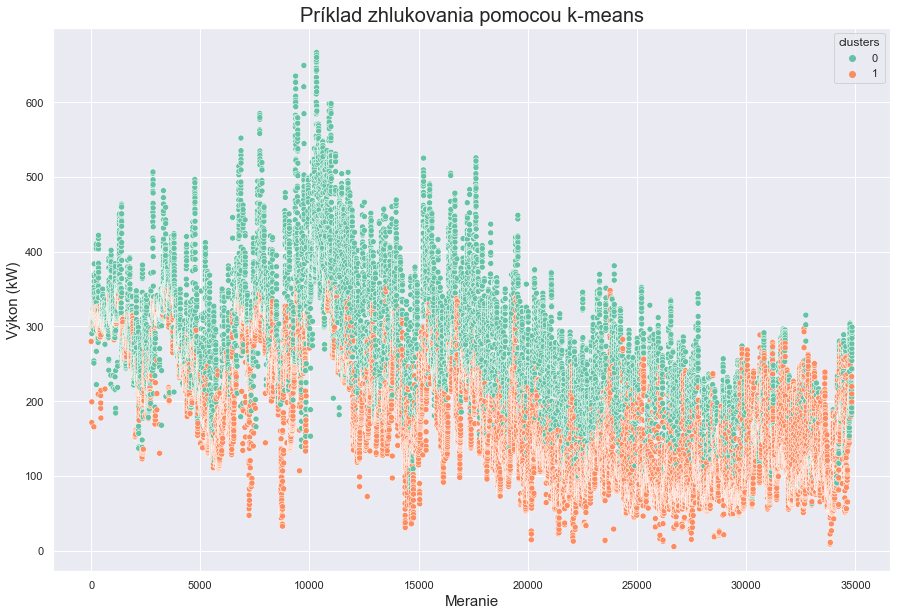

In [39]:
sns.set(rc={'figure.figsize':(15,10)})
p  = sns.scatterplot(data=X, y='production_usage', x=X.index,hue='clusters',palette="Set2")
p.set_ylabel("Výkon (kW)", fontsize = 15)
p.set_xlabel("Meranie", fontsize = 15)
p.set_title("Príklad zhlukovania pomocou k-means", fontsize=20)
plt.show()

In [40]:
%%time

features =  [
        'price', 'isWeekend', 'isHoliday', 'production_usage',
        'consumption_usage', 'temp', 'wind',
        '1_step_prod','1_step_cons', '2_step_prod', '2_step_cons',
        '3_step_prod','3_step_cons', '4_step_prod', '4_step_cons'
            ]

X = df[features].copy()
kmeans = AgglomerativeClustering(n_clusters=2)
X['clusters'] = kmeans.fit_predict(X)

CPU times: user 12 s, sys: 1.12 s, total: 13.1 s
Wall time: 13.1 s


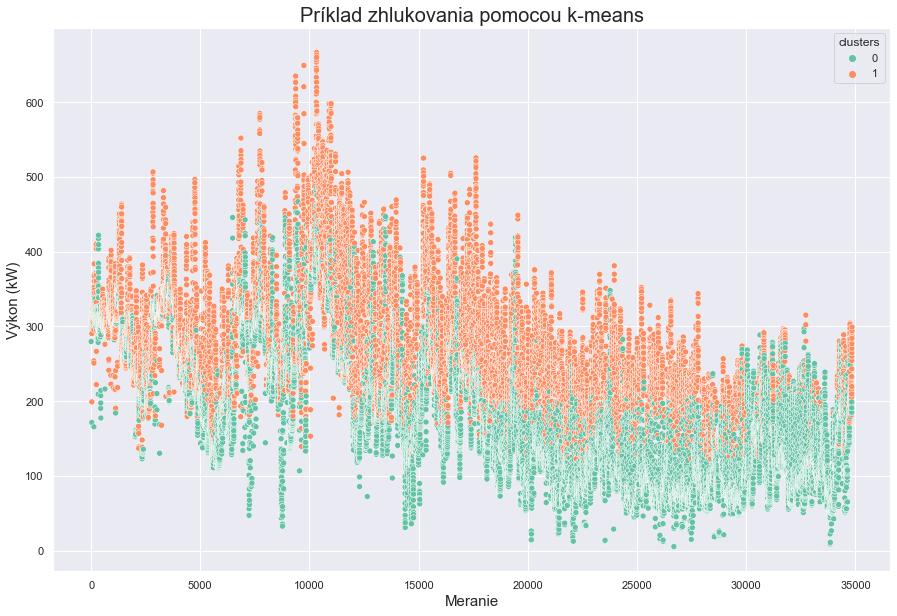

In [41]:
sns.set(rc={'figure.figsize':(15,10)})
p  = sns.scatterplot(data=X, y='production_usage', x=X.index,hue='clusters',palette="Set2")
p.set_ylabel("Výkon (kW)", fontsize = 15)
p.set_xlabel("Meranie", fontsize = 15)
p.set_title("Príklad zhlukovania pomocou k-means", fontsize=20)
plt.show()

In [47]:
%%time

features =  [
        'price', 'isWeekend', 'isHoliday', 'production_usage',
        'consumption_usage', 'temp', 'wind',
        '1_step_prod','1_step_cons', '2_step_prod', '2_step_cons',
        '3_step_prod','3_step_cons', '4_step_prod', '4_step_cons'
            ]

X = df[features].copy()
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1,n_jobs=-1)
X['clusters'] = km.fit_predict(X)

Best run was number 2
CPU times: user 1.45 s, sys: 60.8 ms, total: 1.51 s
Wall time: 7.66 s


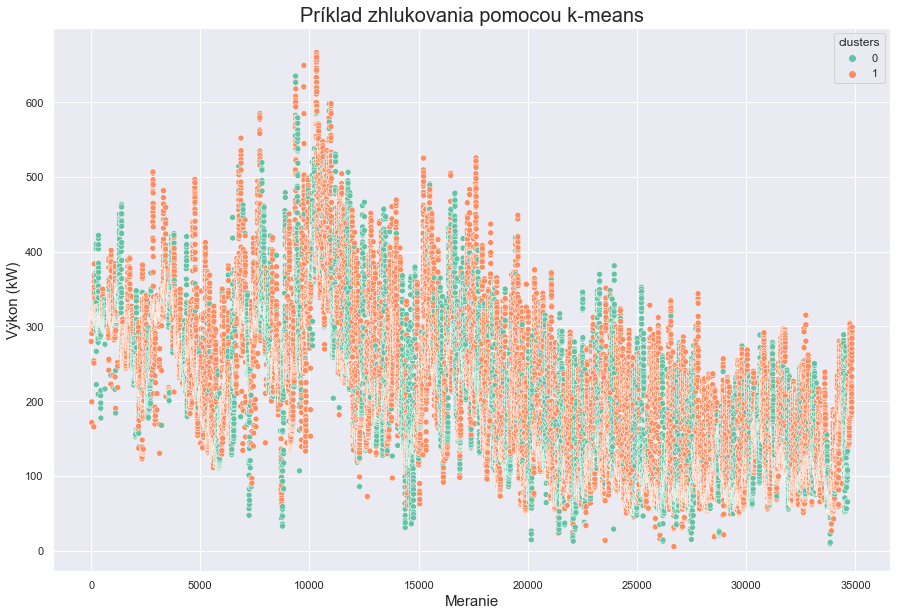

In [48]:
sns.set(rc={'figure.figsize':(15,10)})
p  = sns.scatterplot(data=X, y='production_usage', x=X.index,hue='clusters',palette="Set2")
p.set_ylabel("Výkon (kW)", fontsize = 15)
p.set_xlabel("Meranie", fontsize = 15)
p.set_title("Príklad zhlukovania pomocou k-means", fontsize=20)
plt.show()